In [1]:
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt

import typing

In [2]:
from demos import common

## Functions and data

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression

X_r,y_r = make_regression(
  n_samples=5000,
  n_features=4,
  n_informative=3,
  noise=2
)
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(
  X_r,
  y_r,
  test_size=0.33,
  random_state=42
)

from sklearn.datasets import make_classification

X_c,y_c = make_classification(n_samples=1000, n_features=4, n_redundant=0)

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_r, y_r, test_size=0.33, random_state=42)

## Learning Rate

In [4]:
def scheduler(epoch, lr, cutoff_epoch) -> float:
  if epoch < cutoff_epoch:
    return float(lr)
  else:
    return float(lr * tf.math.exp(-0.1))
  
callback = keras.callbacks.LearningRateScheduler(scheduler)


def get_model():
  model = keras.models.Sequential()
  model.add(keras.layers.InputLayer(shape=(4,)))
  model.add(keras.layers.Dense(1))
  return model


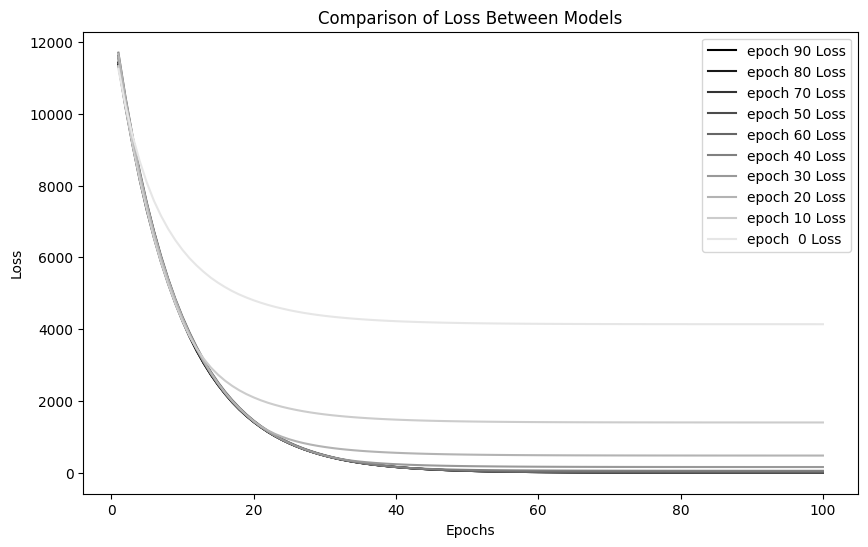

In [5]:
common.plot_multiple_histories(
  histories={
    f"epoch{i:3d}" : common.train_model(
      model=get_model(),
      X=X_train_r,
      y=y_train_r,
      callbacks=[
        keras.callbacks.LearningRateScheduler(lambda e, lr : scheduler(e, lr, i))
      ]
    )
    for i in range(0, 100, 10)
  }
)

## Early Stopping

epochs run: 46


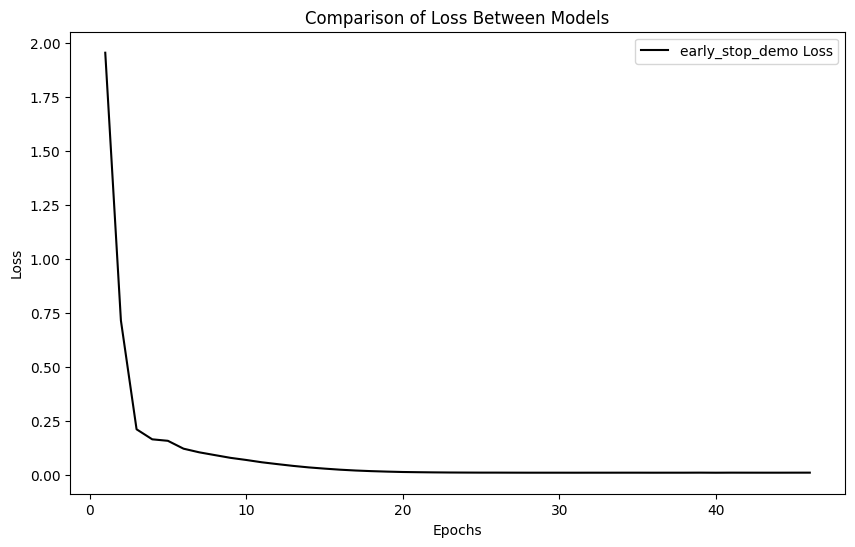

In [29]:

# Simple regression data: noisy linear relation
X = np.random.rand(200, 1)
y = 3 * X.squeeze() + np.random.randn(200) * 0.1

model = keras.Sequential([
    keras.layers.Input(shape=(1,)),
    keras.layers.Dense(10, activation="relu"),
    keras.layers.Dense(1)
])

callback = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=5,
    restore_best_weights=True
)

history = common.train_model(
    model,
    X=X,
    y=y,
    optimizer=keras.optimizers.Adam(learning_rate=0.01),
    loss="mse",
    metrics=["mae"],
    epochs=200,
    batch_size=16,
    validation_split=0.2,
    callbacks=[callback]
)

print(f"epochs run: {len(history.history['loss'])}")
common.plot_multiple_histories({"early_stop_demo": history})

## Weight Regularization

In [15]:

from sklearn.datasets import make_classification

X,y = make_classification(n_samples=1000, n_features=4, n_redundant=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [23]:


def train_model_regular(regularizer_rate=1.0) -> keras.callbacks.History:
  model = keras.models.Sequential()
  model.add(keras.Input(shape=(4,)))
  model.add(keras.layers.Dense(10))
  model.add(
    keras.layers.Dense(
      10,
      kernel_regularizer=keras.regularizers.l2(regularizer_rate)
    )
  )
  model.add(keras.layers.Dense(1, activation='sigmoid'))
  
  model.compile(
  )
  history = common.train_model(
    model,
    X=X_train,
    y=y_train,
    optimizer=keras.optimizers.SGD(),
    loss='binary_crossentropy',
    metrics=['accuracy'],
    batch_size=32,
    epochs=40,
    validation_split=0.3
  )
  
  return history



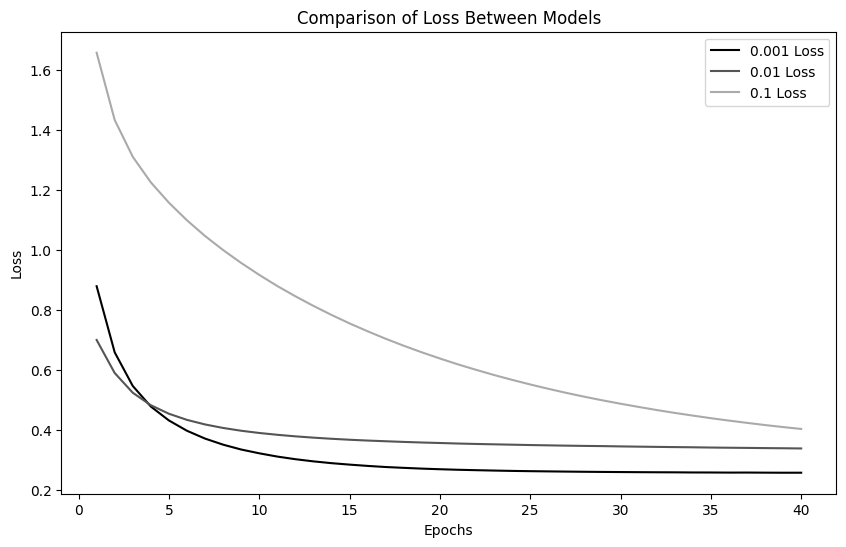

In [24]:
common.plot_multiple_histories(
  histories={
    "0.001" : train_model_regular(0.001),
    "0.01" : train_model_regular(0.01),
    "0.1" : train_model_regular(0.1),
  }
)

## Dropout


In [ ]:


def train_model_dropout(dropout_rate) -> keras.callbacks.History:
  model = keras.models.Sequential()
  model.add(keras.Input(shape=(4,)))
  model.add(keras.layers.Dropout(dropout_rate))
  model.add(keras.layers.Dense(10))
  model.add(keras.layers.Dropout(dropout_rate))
  model.add(keras.layers.Dense(1, activation='sigmoid'))
  
  model.compile(
    optimizer='SGD',
    loss='binary_crossentropy',
    metrics=['accuracy']
  )
  history = model.fit(
    X_train,
    y_train,
    batch_size=32,
    epochs=40,
    validation_split=0.3
  )
  
  return history


In [ ]:
common.plot_multiple_histories(
  histories={
    f"{val:f}" : train_model_regular(0.001)
    for val in np.arange(0.1, 1.01, 0.2)
  }
)